# Santander Data Cleaning, Preprocessing, Models and Results

In [1]:
#from https://www.youtube.com/watch?v=0Lt9w-BxKFQ
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier #Multi-layer Percepitron

#from sklearn import datasets

#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline



In [2]:
satisfaction = pd.read_csv('../data/train.csv')

In [3]:
satisfaction.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
satisfaction.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [6]:
#Preprocessing Data
bins = (0, .5, 1)
group_names =['satisfied', 'unsatisfied']
satisfaction['TARGET'] = pd.cut(satisfaction['TARGET'], bins = bins, labels = group_names)
satisfaction['TARGET'].unique()
#this section not necessary since data was already preprocessed. I left unsatisfied as 1 to keep consistent with the directions despite sat < unsat

[NaN, 'unsatisfied']
Categories (2, object): ['satisfied' < 'unsatisfied']

In [7]:
label_quality = LabelEncoder()

In [8]:
satisfaction['TARGET'] = label_quality.fit_transform(satisfaction['TARGET'])

In [9]:
satisfaction.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,1
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,1
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,1
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,1
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,1
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,1
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,1
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,1
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,1
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,1


In [10]:
satisfaction['TARGET'].value_counts()

1    73012
0     3008
Name: TARGET, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

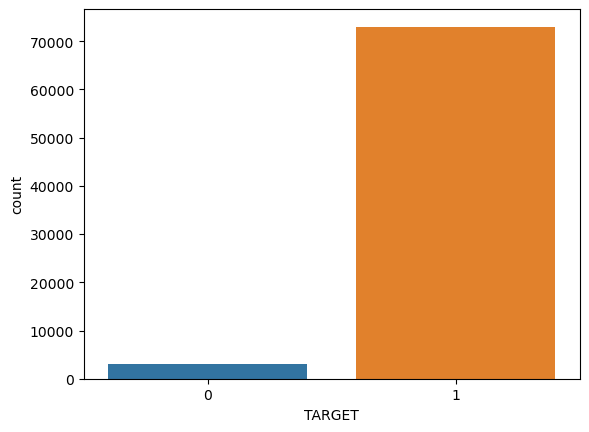

In [11]:
sns.countplot(satisfaction['TARGET'])

In [12]:
# Separate Dataset as response variable and feature variable
X = satisfaction.drop('TARGET', axis = 1)
y = satisfaction['TARGET']

In [13]:
#Train and test splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:10]

array([[-0.78546492,  0.03847964, -0.7882233 , ..., -0.01788388,
        -0.01885542, -0.22560194],
       [ 1.26399856,  0.03847964,  1.37702506, ..., -0.01788388,
        -0.01885542, -0.12652341],
       [ 0.34770634,  0.03847964,  0.83571297, ..., -0.01788388,
        -0.01885542, -0.0312971 ],
       ...,
       [-0.63897685,  0.03847964, -0.7882233 , ..., -0.01788388,
        -0.01885542,  0.15995524],
       [ 1.08000973,  0.03847964,  0.06240999, ..., -0.01788388,
        -0.01885542, -0.00982077],
       [-0.68478575,  0.03847964, -0.7882233 , ..., -0.01788388,
        -0.01885542, -0.33371947]])

# Random Forest Classifier


In [16]:
rfc = RandomForestClassifier(n_estimators=200) #builds 200 trees
rfc.fit(X_train, y_train) #fit data to rfc
pred_rfc = rfc.predict(X_test)  #prediction

In [17]:
pred_rfc[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [18]:
X_test[:20]

array([[ 0.57264244,  0.03847964,  0.91304327, ..., -0.01788388,
        -0.01885542, -0.21519775],
       [-1.49300366,  0.03847964,  2.07299775, ..., -0.01788388,
        -0.01885542,  0.26523201],
       [-0.72956755,  0.03847964, -0.4789021 , ..., -0.01788388,
        -0.01885542, -0.18926738],
       ...,
       [-1.42692654,  0.03847964, -0.710893  , ..., -0.01788388,
        -0.01885542, -0.40012787],
       [-1.44235594,  0.03847964, -0.32424151, ..., -0.01788388,
        -0.01885542,  0.2510771 ],
       [ 0.64362684,  0.03847964,  0.52639178, ..., -0.01788388,
        -0.01885542, -0.38302542]])

In [19]:
#Results of how our model(RFC) performed
print(classification_report(y_test, pred_rfc))
print('Confusion Matrix RFC')
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.26      0.03      0.05       607
           1       0.96      1.00      0.98     14597

    accuracy                           0.96     15204
   macro avg       0.61      0.51      0.51     15204
weighted avg       0.93      0.96      0.94     15204

Confusion Matrix RFC
[[   16   591]
 [   46 14551]]


In [20]:
# prints array of columns
column_headers = list(satisfaction.columns.values)

column_headers

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 '

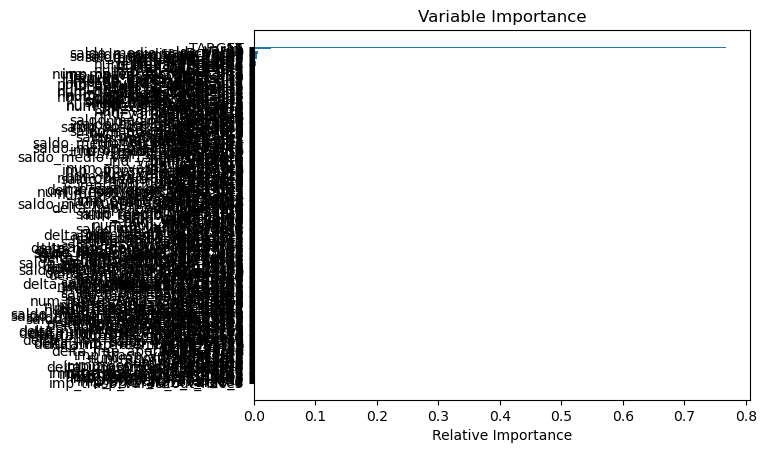

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10,
                                random_state=1)

features = np.array(column_headers)
clf = RandomForestClassifier()
clf.fit(satisfaction[features], satisfaction['TARGET'])

# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) 

plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()




# Feature Importances

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest.fit(X_train, y_train.values.ravel())

importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

feat_labels = satisfaction.columns[1:]
print('Feature Importances')
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

Feature Importances
 1) var3                           0.245666
 2) TARGET                         0.203228
 3) imp_ent_var16_ult1             0.156903
 4) saldo_medio_var8_hace2         0.023867
 5) saldo_medio_var5_ult1          0.019860
 6) saldo_var31                    0.018997
 7) saldo_var2_ult1                0.018487
 8) num_med_var22_ult3             0.014969
 9) saldo_var44                    0.014777
10) num_var45_hace3                0.013877
11) num_var45_ult1                 0.013528
12) saldo_medio_var5_hace3         0.012087
13) saldo_medio_var5_ult3          0.011260
14) num_var22_ult1                 0.010053
15) num_meses_var5_ult3            0.009060
16) num_var22_hace3                0.008834
17) saldo_var6                     0.008344
18) num_var45_ult3                 0.008266
19) delta_imp_amort_var18_1y3      0.007859
20) num_var37_med_ult2             0.006199
21) ind_var31_0                    0.006164
22) num_var22_ult3                 0.005917
23) num_mese

# Support Vector Model Classifier (Non-linear SVM)

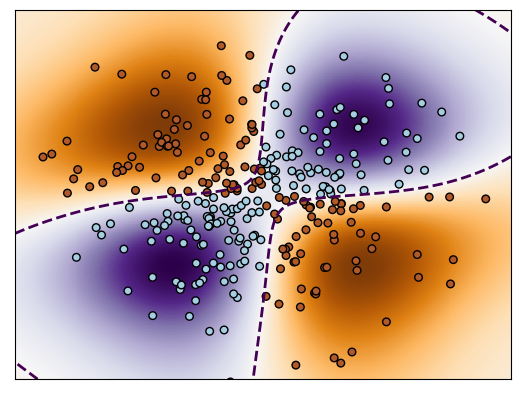

In [23]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()



# SVM

In [ ]:
clf = svm.SVC()
#clf.fit(X_train, y_train)
clf.fit(X, Y)
pred_clf = clf.predict(X_test)

In [ ]:
#Results of how our model(SVM) performed
print(classification_report(Y, pred_clf))
print('Confusion Matrix SVM')
print(confusion_matrix(Y, pred_clf))

# Neural Network

In [26]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [27]:
#Results of how our model(NN) performed
print(classification_report(y_test, pred_mlpc))
print('Confusion Matrix Neural Network')
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.20      0.02      0.03       607
           1       0.96      1.00      0.98     14597

    accuracy                           0.96     15204
   macro avg       0.58      0.51      0.50     15204
weighted avg       0.93      0.96      0.94     15204

Confusion Matrix Neural Network
[[   10   597]
 [   39 14558]]
